In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Step 1: Import necessary libraries and define the target function.

In [13]:
# Define the function Y = 7X^3 - 12X^2 - 22X + 7
def target_function(X):
    return 7 * X**3 - 12 * X**2 - 22 * X + 7


Step 2: Generate training data.

In [14]:
# Generate random X values between -5 and 5 for training
np.random.seed(42)
X_train = np.random.uniform(low=-5, high=5, size=(1000, 1))
y_train = target_function(X_train)


Step 3: Build the Deep Neural Network.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                64        
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


Step 4: Compile the model.

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')


Step 5: Train the model.

In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 29.0506
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 15.0695
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 11.8168
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 11.4578
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 26.9799
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 12.1348
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 13.8572
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 8.3141
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 8.9194
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 19.3462
Epoch 11/100
32/32 [==============================] - 0s 6ms/step - loss: 11.1483
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 7.0516
Epoch 13/100
32/32 [========

Step 6: Generate test data for evaluation.

In [18]:
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
y_test = target_function(X_test)


Step 7: Make predictions using the trained model.

In [19]:
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


Step 8: Visualize the results.

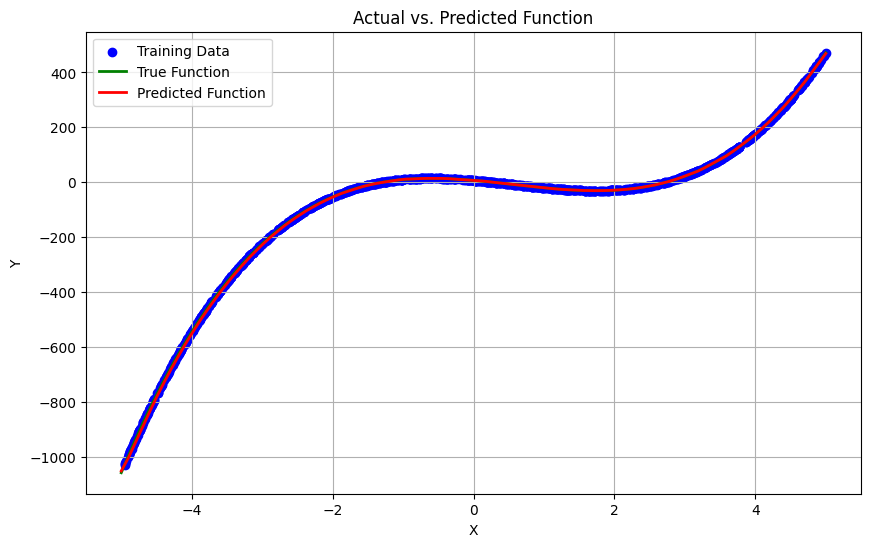

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.plot(X_test, y_test, label='True Function', color='green', linewidth=2)
plt.plot(X_test, y_pred, label='Predicted Function', color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Function')
plt.legend()
plt.grid(True)
plt.show()


Generate training data within the range -20 to +20.

In [21]:
# Generate random X values between -20 and 20 for training
np.random.seed(42)
X_train = np.random.uniform(low=-20, high=20, size=(1000, 1))
y_train = target_function(X_train)


Normalize the training data to the range -1 to +1.

In [22]:
X_min = -20
X_max = 20
X_train_normalized = (X_train - X_min) / (X_max - X_min) * 2 - 1
y_min = np.min(y_train)
y_max = np.max(y_train)
y_train_normalized = (y_train - y_min) / (y_max - y_min) * 2 - 1


Split the data into training, validation, and test sets.

In [23]:
num_samples = X_train_normalized.shape[0]
num_validation_samples = int(0.05 * num_samples)
num_test_samples = int(0.05 * num_samples)

X_validation = X_train_normalized[:num_validation_samples]
y_validation = y_train_normalized[:num_validation_samples]

X_test = X_train_normalized[num_validation_samples:num_validation_samples + num_test_samples]
y_test = y_train_normalized[num_validation_samples:num_validation_samples + num_test_samples]

X_train = X_train_normalized[num_validation_samples + num_test_samples:]
y_train = y_train_normalized[num_validation_samples + num_test_samples:]


Build and train the Deep Neural Network.

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation),
                    epochs=100, batch_size=32, verbose=1)


Epoch 1/100
29/29 [==============================] - 2s 31ms/step - loss: 0.0569 - val_loss: 0.0238
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.0135
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0065
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 4.9056e-04
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 6.4803e-04 - val_loss: 4.6590e-04
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 5.2261e-04 - val_loss: 3.2591e-04
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 4.1199e-04 - val_loss: 1.7784e-04
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 2.1888

Visualize the training accuracy vs validation and training error vs validation error curves.

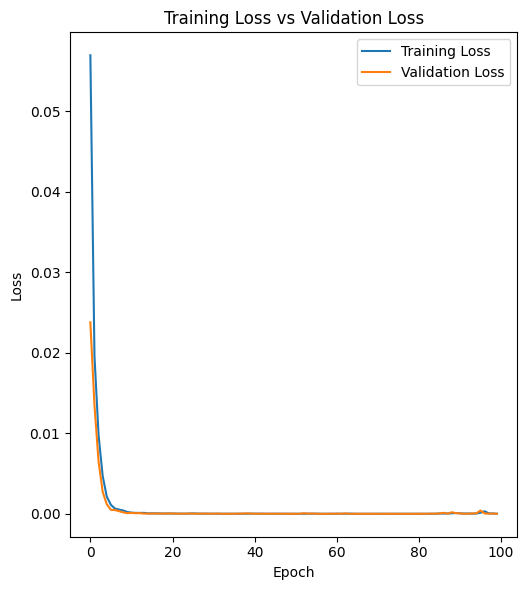

In [30]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()



Use the test data for prediction and display the prediction accuracy vs true levels of the test data.

2/2 [==============================] - 0s 6ms/step


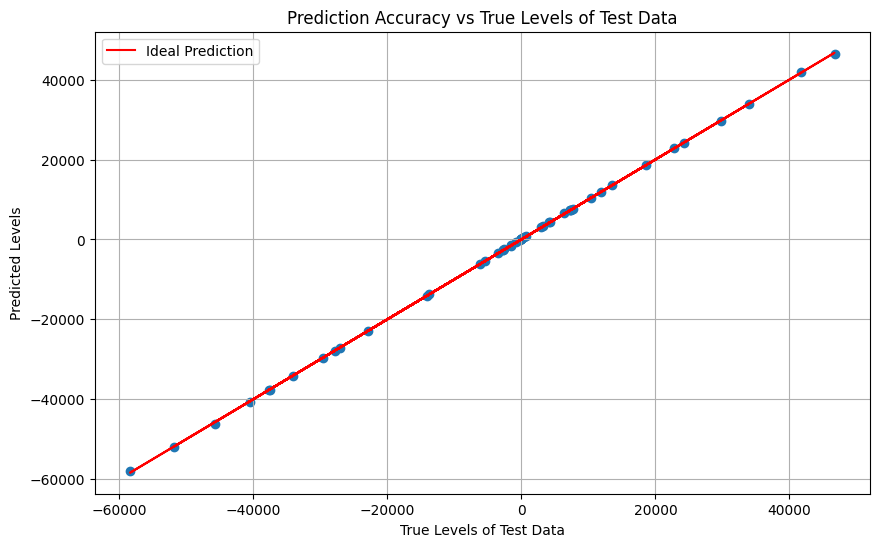

In [26]:
y_pred = model.predict(X_test)

# Denormalize the predictions and true values
y_pred_denormalized = (y_pred + 1) * (y_max - y_min) / 2 + y_min
y_test_denormalized = (y_test + 1) * (y_max - y_min) / 2 + y_min

plt.figure(figsize=(10, 6))
plt.scatter(y_test_denormalized, y_pred_denormalized)
plt.plot(y_test_denormalized, y_test_denormalized, color='red', label='Ideal Prediction')
plt.xlabel('True Levels of Test Data')
plt.ylabel('Predicted Levels')
plt.title('Prediction Accuracy vs True Levels of Test Data')
plt.legend()
plt.grid(True)
plt.show()
